In [ ]:
import pde
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# Important: t>0, u_x, u_xx output u[1:-1]
# Derivative formula: forward in time, central in space
def u_x(u, t, h):
    u_at_t = u[t]
    return (u_at_t[2:] - u_at_t[:-2]) / (2*h)

def u_xx(u, t, h):
    u_at_t = u[t]
    return (u_at_t[2:] - 2*u_at_t[1:-1] + u_at_t[:-2]) / h**2

def u_t(u, t, k):
    u_at_t1 = u[t]
    u_at_t2 = u[t+1]
    return (u_at_t2 - u_at_t1)/k

def u_tt(u, t, k):
    u_at_t1 = u[t]
    u_at_t2 = u[t+1]
    u_at_t3 = u[t+2]
    return (u_at_t3 - 2*u_at_t2 + u_at_t1)/ k**2

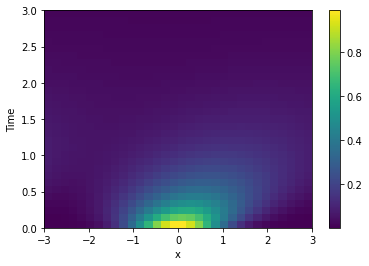

In [ ]:
# Example 1
eq = PDE({"u": "laplace(u) - u - d_dx(u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [ ]:
# Time t from 1 to 2 with increment 0.1
t_num = 100
x_num = 50
grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")
x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
pypde_performance = []
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u - ux, squared = False))


0.0056913635349633744
0.0033085816983371708
0.0014831479858479963
0.0029238352612319866
0.004267422991632419
0.0032993689766414513
0.0031747690059017856
0.001170241542700609
0.005242362679502922


In [ ]:
# Time t from 4 to 5 with increment 0.1
t_num = 100
x_num = 50
grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "exp(-x**2)")
x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u - ux, squared = False))


0.00042463203274700366
0.0006231291289874704
0.0004449161214656123
0.0001823090849958594
0.000344312297000611
0.0003341990670715963
0.0004645927342924228
0.00037639196694258417
7.941513819898525e-05


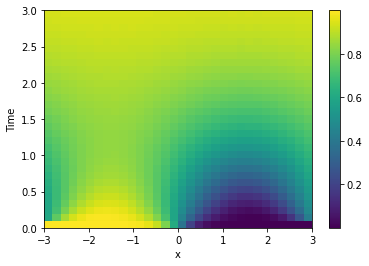

In [ ]:
# Example 2
eq = PDE({"u": "laplace(u) + u*(1-u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(5*x))")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [ ]:
t_num = 100
x_num = 50

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(5*x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx + u*(1-u), squared = False))

0.02599555087929085
0.14186744574747773
0.1272350953709989
0.03520684424996161
0.06512254550146135
0.04760674203793773
0.0327025040603142
0.11126597251696393
0.1241355016836042


In [ ]:
t_num = 100
x_num = 50

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(5*x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx + u*(1-u), squared = False))


0.03131702846675222
0.08663545121832965
0.03144449961413503
0.046021546745091645
0.09891498731030496
0.20613713331991548
0.05472876456896084
0.04071214499815743
0.10517195376441973


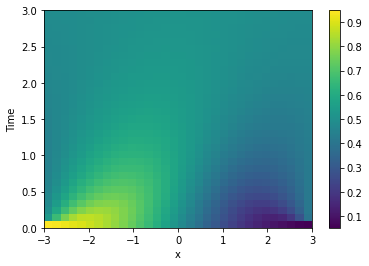

In [ ]:
# Example 3
eq = PDE({"u": "laplace(u) - u*d_dx(u)"})
grid = CartesianGrid([[-3, 3]], [32], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

# solve the equation and store the trajectory
storage = MemoryStorage()
sol = eq.solve(state, t_range=3, tracker=storage.tracker(0.1))

# plot the trajectory as a space-time plot
plot_kymograph(storage)

In [ ]:
t_num = 100
x_num = 50

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(1,2,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u*ux, squared = False))

0.03156001682504463
0.04007150376501241
0.029097367093922948
0.04258647348762849
0.01735008052252762
0.01955508435054372
0.048887534738698196
0.03355646515841184
0.037068416896497466


In [ ]:
t_num = 100
x_num = 50

grid = CartesianGrid([[-3, 3]], [x_num], periodic=True)
state = ScalarField.from_expression(grid, "1/(1+exp(x))")

x_tr = ScalarField.from_expression(grid, "x").data
t_li = np.linspace(4,5,t_num)

In [ ]:
%%capture test
data_pypde = []
for t in t_li:
    result = eq.solve(state, t_range=t)
    data_pypde.append(result.data)

In [ ]:
data_pypde = np.asarray(data_pypde)
t_test = np.linspace(0, 100, 11)[1:-1]
for t in t_test:
    t = int(t)
    uxx = u_xx(data_pypde, t, x_tr[1] - x_tr[0])
    ux = u_x(data_pypde, t, x_tr[1] - x_tr[0])
    ut = u_t(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    utt = u_tt(data_pypde, t, t_li[1] - t_li[0])[1:-1]
    u = data_pypde[t, 1:-1]
    print(mean_squared_error(ut, uxx - u*ux, squared = False))

0.03501869539423099
0.07476458927433664
0.03180267179275083
0.024704720571292707
0.019177689955619866
0.05840750638262899
0.039852295884264914
0.012380933448384146
0.03055600193980842
